I live a long distance from where I work, I am able to work from home two days a week but my daily commute is 159km.
So even on a three day week just using the car for work means that I drive close to 500km a week. 
My annual distance driven is around 35,000km.  
I have driven diesel cars over the last few years due to their fuel economy#With fuel prices increasing, along with enviromental considerations, I am considering moving away from diesel cars. 
I would like to investigate the feasability of me switching to a fully electric car as Hybrids and Plug in Hybrids
will not meet my requirements. 
I will look at the currently available Battery Electric Vehicles to see if any would meet my needs .
Budget is also a consideration, both from the perspective of the cost of the car and the cost of running the car.

In [2]:
# importing libraries
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd

#Pulling the html code from ev-database.org electric cars webpage

url='https://ev-database.org/#sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~450|range-slider-battery:prev~next=10~200|range-slider-towweight:prev~next=0~2500|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=all'

data=requests.get(url)



In [3]:
# Creating an empty list to hold the data

ev_data=[]

# Creating a variable to hold the scraped data

html = BeautifulSoup(data.text, 'html.parser')

#creating a variable to allow structuring of data using html containers and class names

evcars = html.select('div.list-item')

# iterating through evcars to scrape the desired data using class names to identify relevant data

for evcar in evcars:
    
    make = evcar.select('.title')[0].get_text()
    model = evcar.select('.model')[0].get_text()
    battery_Kwh = evcar.select('.battery')[0].get_text()
    acceleration = evcar.select('.acceleration')[0].get_text()
    top_speed = evcar.select('.topspeed')[0].get_text()
    erange_real = evcar.select('.erange_real')[0].get_text()
    efficiency = evcar.select('.efficiency')[0].get_text()
    price_in_de = evcar.select('.country_de')[0].get_text()
    
    #adding the data to ev_data
    
    ev_data.append({"Make": make, "Model": model, "Battery_(Kwh)": battery_Kwh, "Acceleration_in_Secs_(1-100)": acceleration,
                    "Top_Speed_(km/h)": top_speed, "Range_(km)": erange_real, "Efficiency_(Wh/km)": efficiency, "Price_in_Germany (€)": price_in_de})
    
# Converting the list of dictionaries in to a Pandas DataFrame    

ev_df = pd.DataFrame(ev_data)


# Print the head of the dataframe to check structure and check dataframe shape

print(ev_df.head())

print(ev_df.shape)

# Check the DataFrame info

print(ev_df.info())

    


                                  Make                          Model  \
0  Tesla Model 3 Long Range Dual Motor  Model 3 Long Range Dual Motor   
1                      BMW i4 eDrive40                    i4 eDrive40   
2                       Tesla Model 3                        Model 3    
3                Dacia Spring Electric                Spring Electric   
4                           Kia EV6 GT                         EV6 GT   

  Battery_(Kwh) Acceleration_in_Secs_(1-100) Top_Speed_(km/h) Range_(km)  \
0            75                      4.4 sec         233 km/h     485 km   
1          80.7                      5.7 sec         190 km/h     470 km   
2          57.5                      6.1 sec         225 km/h     380 km   
3          26.8                     15.0 sec         125 km/h     170 km   
4          72.5                      3.5 sec         260 km/h     360 km   

  Efficiency_(Wh/km) Price_in_Germany (€)  
0          155 Wh/km              €60,260  
1          172 W

# Data Cleaning

In [4]:
# Stripping out the additional text in the Make column that already exists in the Model column

ev_df['Make']=[a.replace(b, '').strip() for a,b in zip(ev_df['Make'],ev_df['Model'])]

# Creating a new column concatenating Make and Model to provide a separate column with full description

ev_df['Make/Model'] = ev_df['Make'] + " " + ev_df['Model']

# Stripping out extraneous text from dataframe columns to facilitate analysis later

ev_df['Acceleration_in_Secs_(1-100)'] = ev_df['Acceleration_in_Secs_(1-100)'].str.strip("sec")

ev_df['Top_Speed_(km/h)'] = ev_df['Top_Speed_(km/h)'].str.strip(" km/h")

ev_df['Range_(km)'] = ev_df['Range_(km)'].str.strip(" km")

ev_df['Efficiency_(Wh/km)'] = ev_df['Efficiency_(Wh/km)'].str.strip(" Wh/km")

ev_df['Price_in_Germany (€)'] = ev_df['Price_in_Germany (€)'].str.replace("€","")

ev_df['Price_in_Germany (€)'] = ev_df['Price_in_Germany (€)'].str.replace(",","")

ev_df['Price_in_Germany (€)'] = ev_df['Price_in_Germany (€)'].str.strip("*")

ev_df['Price_in_Germany (€)'] = ev_df['Price_in_Germany (€)'].str.strip("N/A")

print(ev_df.head())  

print(ev_df.info())  

    Make                          Model Battery_(Kwh)  \
0  Tesla  Model 3 Long Range Dual Motor            75   
1    BMW                    i4 eDrive40          80.7   
2  Tesla                       Model 3           57.5   
3  Dacia                Spring Electric          26.8   
4    Kia                         EV6 GT          72.5   

  Acceleration_in_Secs_(1-100) Top_Speed_(km/h) Range_(km) Efficiency_(Wh/km)  \
0                         4.4               233        485                155   
1                         5.7               190        470                172   
2                         6.1               225        380                151   
3                        15.0               125        170                158   
4                         3.5               260        360                201   

  Price_in_Germany (€)                           Make/Model  
0                60260  Tesla Model 3 Long Range Dual Motor  
1                58300                      BM

In [5]:
# converting objects to numeric values where possible to facilitate analysis later

cols = ev_df.columns

ev_df[cols]=ev_df[cols].apply(pd.to_numeric, errors='ignore')

print(ev_df.info())
print(ev_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Make                          228 non-null    object 
 1   Model                         228 non-null    object 
 2   Battery_(Kwh)                 228 non-null    float64
 3   Acceleration_in_Secs_(1-100)  228 non-null    float64
 4   Top_Speed_(km/h)              228 non-null    int64  
 5   Range_(km)                    228 non-null    int64  
 6   Efficiency_(Wh/km)            228 non-null    int64  
 7   Price_in_Germany (€)          214 non-null    float64
 8   Make/Model                    228 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 16.2+ KB
None
    Make                          Model  Battery_(Kwh)  \
0  Tesla  Model 3 Long Range Dual Motor           75.0   
1    BMW                    i4 eDrive40           80.7   
2  Te

In [6]:
# I can see from the dataframe info above that the Price column has a number of NaN values
# Firstly I will identify the rows with NaN values and identify the associated cars to check if I would like to keep any

bool_series = pd.isnull(ev_df['Price_in_Germany (€)'])
ev_df[bool_series]


,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
58,Seres,3,52.0,8.9,155,270,193,NaN,Seres 3
93,Hyundai,IONIQ 5 Long Range 2WD,72.5,7.4,185,390,186,NaN,Hyundai IONIQ 5 Long Range 2WD
100,Volkswagen,ID.4 Pro,77.0,10.4,160,410,188,NaN,Volkswagen ID.4 Pro
102,Hyundai,IONIQ 5 Long Range AWD,72.5,5.2,185,385,188,NaN,Hyundai IONIQ 5 Long Range AWD
117,Volkswagen,ID.3 Pure Performance,45.0,8.9,160,275,164,NaN,Volkswagen ID.3 Pure Performance
122,MG,MG5 EV Long Range,57.0,7.7,185,340,168,NaN,MG MG5 EV Long Range
130,JAC,iEV7s,39.0,12.0,132,225,173,NaN,JAC iEV7s
159,MG,MG5 Electric Standard Range,46.0,8.5,185,260,177,NaN,MG MG5 Electric Standard Range
195,Toyota,PROACE Shuttle L 75 kWh,65.0,13.1,130,245,265,NaN,Toyota PROACE Shuttle L 75 kWh
205,Toyota,PROACE Shuttle M 75 kWh,65.0,13.1,130,245,265,NaN,Toyota PROACE Shuttle M 75 kWh


In [7]:
# Of the cars listed with NaN values in the cell above I would like to keep the Hyundai models.
# I will look up the correct prices for these cars and insert them in to the dataframe
# I know the two values I want to replace are at row indices 93 and 102 in the Price column
# Prices from https://www.kearys.ie/hyundai/new-cars/ioniq-5/

# First I will use the .at() method

ev_df.at[93, 'Price_in_Germany (€)'] = 53995

# For the second one I will use the .loc() method

ev_df.loc[102, 'Price_in_Germany (€)'] = 65495

#I will check the rows in the Price column with Nan values again

bool_series = pd.isnull(ev_df['Price_in_Germany (€)'])
ev_df[bool_series]


,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
58,Seres,3,52.0,8.9,155,270,193,NaN,Seres 3
100,Volkswagen,ID.4 Pro,77.0,10.4,160,410,188,NaN,Volkswagen ID.4 Pro
117,Volkswagen,ID.3 Pure Performance,45.0,8.9,160,275,164,NaN,Volkswagen ID.3 Pure Performance
122,MG,MG5 EV Long Range,57.0,7.7,185,340,168,NaN,MG MG5 EV Long Range
130,JAC,iEV7s,39.0,12.0,132,225,173,NaN,JAC iEV7s
159,MG,MG5 Electric Standard Range,46.0,8.5,185,260,177,NaN,MG MG5 Electric Standard Range
195,Toyota,PROACE Shuttle L 75 kWh,65.0,13.1,130,245,265,NaN,Toyota PROACE Shuttle L 75 kWh
205,Toyota,PROACE Shuttle M 75 kWh,65.0,13.1,130,245,265,NaN,Toyota PROACE Shuttle M 75 kWh
208,Toyota,PROACE Shuttle L 50 kWh,45.0,12.1,130,175,257,NaN,Toyota PROACE Shuttle L 50 kWh
213,Peugeot,e-Expert Combi Compact 50 kWh,45.0,12.1,130,180,250,NaN,Peugeot e-Expert Combi Compact 50 kWh


In [8]:
# The two Hyundai cars now have the correct prices

ev_df[ev_df['Make'] == 'Hyundai']

,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
6,Hyundai,IONIQ 5 Long Range AWD,70.0,5.2,185,370,189,48900.0,Hyundai IONIQ 5 Long Range AWD
9,Hyundai,IONIQ Electric,38.3,9.7,165,250,153,35350.0,Hyundai IONIQ Electric
17,Hyundai,Kona Electric 64 kWh,64.0,7.9,167,395,162,41850.0,Hyundai Kona Electric 64 kWh
39,Hyundai,IONIQ 5 Long Range 2WD,70.0,7.4,185,380,184,45100.0,Hyundai IONIQ 5 Long Range 2WD
75,Hyundai,IONIQ 5 Standard Range 2WD,54.0,8.5,185,295,183,41900.0,Hyundai IONIQ 5 Standard Range 2WD
81,Hyundai,Kona Electric 39 kWh,39.2,9.9,155,250,157,35650.0,Hyundai Kona Electric 39 kWh
93,Hyundai,IONIQ 5 Long Range 2WD,72.5,7.4,185,390,186,53995.0,Hyundai IONIQ 5 Long Range 2WD
102,Hyundai,IONIQ 5 Long Range AWD,72.5,5.2,185,385,188,65495.0,Hyundai IONIQ 5 Long Range AWD
165,Hyundai,IONIQ 5 Standard Range AWD,54.0,6.1,185,290,186,45700.0,Hyundai IONIQ 5 Standard Range AWD


In [9]:
# I will drop the rows with NaN values in Price

ev_df = ev_df.dropna(subset=['Price_in_Germany (€)'])


print(ev_df.info())
print(ev_df.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 227
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Make                          216 non-null    object 
 1   Model                         216 non-null    object 
 2   Battery_(Kwh)                 216 non-null    float64
 3   Acceleration_in_Secs_(1-100)  216 non-null    float64
 4   Top_Speed_(km/h)              216 non-null    int64  
 5   Range_(km)                    216 non-null    int64  
 6   Efficiency_(Wh/km)            216 non-null    int64  
 7   Price_in_Germany (€)          216 non-null    float64
 8   Make/Model                    216 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 16.9+ KB
None
        Make                          Model  Battery_(Kwh)  \
0      Tesla  Model 3 Long Range Dual Motor           75.0   
1        BMW                    i4 eDrive40           8

# Summary Data Analysis

In [10]:
# Summary analysis
import matplotlib.pyplot as plt
import seaborn as sns



print("The median battery capacity is "+  str(ev_df['Battery_(Kwh)'].median()) + "Kwh."'\n')

print("The car with the highest battery capacity is the "+ ev_df.loc[ev_df['Battery_(Kwh)'].idxmax(),'Make/Model'] + " at " + str(ev_df['Battery_(Kwh)'].max()) + "Kwh."'\n')

print("The car with the lowest battery capacity is the "+ ev_df.loc[ev_df['Battery_(Kwh)'].idxmin(),'Make/Model'] + " at " + str(ev_df['Battery_(Kwh)'].min()) + "Kwh."'\n')

print("The median range is " + str(ev_df['Range_(km)'].median()) +"km"'\n')

print("The car with the longest range is the "+ ev_df.loc[ev_df['Range_(km)'].idxmax(),'Make/Model'] + " at " + str(ev_df['Range_(km)'].max()) + "km."'\n')

print("The car with the shortest range is the "+ ev_df.loc[ev_df['Range_(km)'].idxmin(),'Make/Model'] + " at " + str(ev_df['Range_(km)'].min()) + "km."'\n')

print("The median energy efficiency is " + str(ev_df['Efficiency_(Wh/km)'].median()) +" Wh/km"'\n')

print("The most energy efficient car is the "+ ev_df.loc[ev_df['Efficiency_(Wh/km)'].idxmin(),'Make/Model'] + " at " + str(ev_df['Efficiency_(Wh/km)'].min()) + "Wh/km."'\n')

print("The least energy efficient car is the "+ ev_df.loc[ev_df['Efficiency_(Wh/km)'].idxmax(),'Make/Model'] + " at " + str(ev_df['Efficiency_(Wh/km)'].max()) + "Wh/km."'\n')

print("The median acceleration rate from 0 to 100 km/h is " + str(ev_df['Acceleration_in_Secs_(1-100)'].median()) + "sec"'\n')

print("The car with the fastest acceleration is the "+ ev_df.loc[ev_df['Acceleration_in_Secs_(1-100)'].idxmin(),'Make/Model'] + " at " + str(ev_df['Acceleration_in_Secs_(1-100)'].min()) + "secs."'\n')

print("The car with the slowest acceleration is the "+ ev_df.loc[ev_df['Acceleration_in_Secs_(1-100)'].idxmax(),'Make/Model'] + " at " + str(ev_df['Acceleration_in_Secs_(1-100)'].max()) + "secs."'\n')

print("The median top speed is " + str(ev_df['Top_Speed_(km/h)'].median()) + "km/h"'\n')

print("The car capable of the highest speed is the "+ ev_df.loc[ev_df['Top_Speed_(km/h)'].idxmax(),'Make/Model'] + " at " + str(ev_df['Top_Speed_(km/h)'].max()) + "km/h."'\n')

print("The car with the lowest maximum speed is the "+ ev_df.loc[ev_df['Top_Speed_(km/h)'].idxmin(),'Make/Model'] + " at " + str(ev_df['Top_Speed_(km/h)'].min()) + "km/h."'\n')

print("The median price for an electric car in Germany is €" + str(int(ev_df['Price_in_Germany (€)'].median())) + '\n')

print("The most expensive car is the "+ ev_df.loc[ev_df['Price_in_Germany (€)'].idxmax(),'Make/Model'] + " at €" + str(int(ev_df['Price_in_Germany (€)'].max()))+'\n')

print("The least expensive car is the "+ ev_df.loc[ev_df['Price_in_Germany (€)'].idxmin(),'Make/Model'] + " at €" + str(int(ev_df['Price_in_Germany (€)'].min()))+'\n')

The median battery capacity is 66.75Kwh.

The car with the highest battery capacity is the Mercedes EQS 450+ at 107.8Kwh.

The car with the lowest battery capacity is the Smart EQ forfour  at 16.7Kwh.

The median range is 345.0km

The car with the longest range is the Mercedes EQS 450+ at 640km.

The car with the shortest range is the Smart EQ forfour  at 95km.

The median energy efficiency is 190.0 Wh/km

The most energy efficient car is the Lightyear One  at 104Wh/km.

The least energy efficient car is the Mercedes EQV 300 Long at 295Wh/km.

The median acceleration rate from 0 to 100 km/h is 7.9sec

The car with the fastest acceleration is the Tesla Model S Plaid at 2.1secs.

The car with the slowest acceleration is the Dacia Spring Electric at 15.0secs.

The median top speed is 160.0km/h

The car capable of the highest speed is the Tesla Model S Plaid at 322km/h.

The car with the lowest maximum speed is the Dacia Spring Electric at 125km/h.

The median price for an electric car in 

<function matplotlib.pyplot.show(close=None, block=None)>

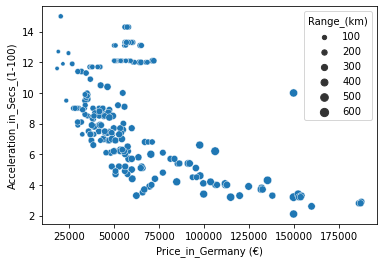

In [11]:
#Checking for any correlation between Price and Acceleration
# This scatterplot shows that there is a moderate, positive correlation between Price and Acceleration (r = 0.58) 
# Range has been added as another vector 

sns.scatterplot(data=ev_df, x='Price_in_Germany (€)',y='Acceleration_in_Secs_(1-100)', size ='Range_(km)')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

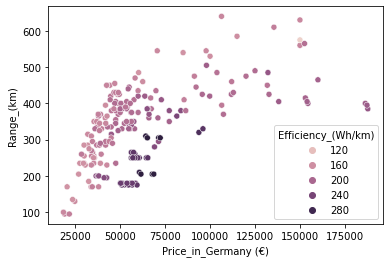

In [12]:
# Checking for any correlation between Price and Range with Efficiency as a further vector using hue
# The correlation between Price and Range is very similar to the Price/Acceleration correlation (r = 0.58)

sns.scatterplot(data=ev_df, x='Price_in_Germany (€)',y='Range_(km)', hue ='Efficiency_(Wh/km)')
plt.show

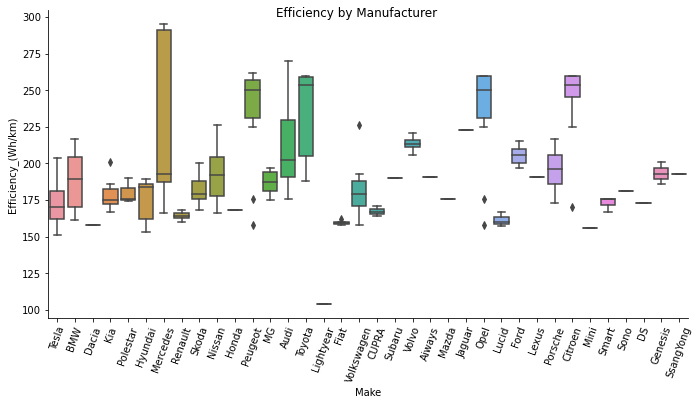

In [13]:
# Plotting out Efficiency by Manufacturer

g=sns.catplot(x='Make', y= 'Efficiency_(Wh/km)', data=ev_df, kind = 'box', height = 5, aspect=2)

g.set_xticklabels(rotation = 70, size =10)

g.fig.suptitle('Efficiency by Manufacturer')

plt.show()

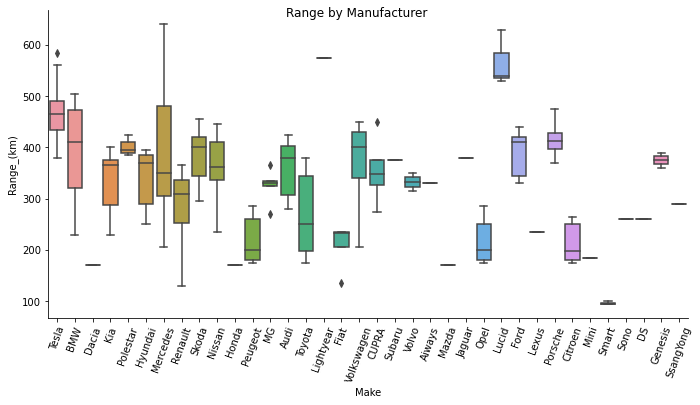

In [14]:
# Plotting out Range by Manufacturer

g=sns.catplot(x='Make', y= 'Range_(km)', data=ev_df, kind = 'box', height = 5, aspect=2)

g.set_xticklabels(rotation = 70, size =10)

g.fig.suptitle('Range by Manufacturer')

plt.show()

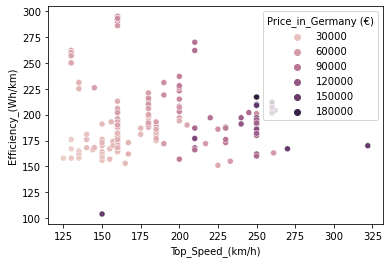

In [15]:
# Checking for any correlation between Top Speed and Efficiency
# This plot doesn't indicate any strong correlation between Top Speed and Efficiency

sns.scatterplot(data=ev_df, x='Top_Speed_(km/h)',y='Efficiency_(Wh/km)', hue ='Price_in_Germany (€)')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

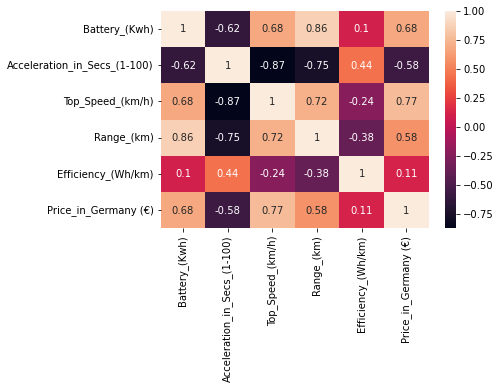

In [16]:
#  Running a correlation heatmap to check for correlations between all dimensions of the data.

sns.heatmap(ev_df.corr(), annot = True)
plt.show

There were some interesting findings in this plot to add to the ones we gleaned from the scatterplots above.
The strongest correlations are between Top Speed and Acceleration (r = -0.88), Battery Capacity and 
Range (r = 0.86) and Acceleration and Range (r = -0.75). 

Just as interesting were those combinations with very weak correlations. 
The Price you pay has very little to do with Fuel Efficiency (r = 0.11). 
Range is much more closely linked to Battery Capacity (r = 0.86) than it does with Fuel Efficiency (r = 0.38).


Now to move on to more specific analysis to find a suitable electric car for my own needs.

# Specific Data Analysis

In [17]:
# Checking  relevant values by Manufacturer

import numpy as np

# Grouping cars by make with Range, Battery Capacity and Price columns.

ev_df.groupby(['Make'])[['Range_(km)', 'Battery_(Kwh)','Efficiency_(Wh/km)', 'Price_in_Germany (€)']].mean().round(2)

,Range_(km),Battery_(Kwh),Efficiency_(Wh/km),Price_in_Germany (€)
Make,,,,
Aiways,330.00,63.00,191.00,35993.00
Audi,358.33,75.49,211.73,71763.33
BMW,386.88,74.08,188.00,73075.00
CUPRA,355.00,59.50,167.25,38205.00
Citroen,212.50,51.67,244.17,49735.83
DS,260.00,45.00,173.00,39440.00
Dacia,170.00,26.80,158.00,20490.00
Fiat,208.75,33.30,159.50,27810.00
Ford,389.00,80.00,205.60,58665.00


In [18]:
# I am interested in Price, Range and EFficiency so I will sort the dataframe by these values

ev_df.sort_values(['Range_(km)', 'Price_in_Germany (€)', 'Efficiency_(Wh/km)'], ascending = [False, False, True])

,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
7,Mercedes,EQS 450+,107.8,6.2,210,640,168,106374.0,Mercedes EQS 450+
57,Lucid,Air Grand Touring,105.0,3.2,270,630,167,150000.0,Lucid Air Grand Touring
22,Mercedes,EQS 580 4MATIC,107.8,4.3,210,610,177,135529.0,Mercedes EQS 580 4MATIC
31,Tesla,Model S Long Range,95.0,3.2,250,585,162,115000.0,Tesla Model S Long Range
32,Lightyear,One,60.0,10.0,150,575,104,150000.0,Lightyear One
...,...,...,...,...,...,...,...,...,...
107,Fiat,500e Hatchback 24 kWh,21.3,9.5,135,135,158,23560.0,Fiat 500e Hatchback 24 kWh
73,Renault,Twingo Electric,21.3,12.6,135,130,164,24790.0,Renault Twingo Electric
143,Smart,EQ fortwo coupe,16.7,11.6,130,100,167,18460.0,Smart EQ fortwo coupe
178,Smart,EQ fortwo cabrio,16.7,11.9,130,95,176,21720.0,Smart EQ fortwo cabrio


In [19]:
# All of the top cars are extremely expensive so I need to find cars within my budget.
# I will create a new dataframe with cars within my budget

budg_ev_df = ev_df[(ev_df['Price_in_Germany (€)'] > 30000) & (ev_df['Price_in_Germany (€)'] < 50000)]

# I will apply the same sorting criteria to the new dataframe

budg_ev_df.sort_values(['Range_(km)', 'Price_in_Germany (€)', 'Efficiency_(Wh/km)'], ascending = [False, False, True])

,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
70,Skoda,Enyaq Coupe iV 80,77.0,8.7,160,455,169,47000.0,Skoda Enyaq Coupe iV 80
35,CUPRA,Born 170 kW - 77 kWh,77.0,7.0,160,450,171,44300.0,CUPRA Born 170 kW - 77 kWh
94,Volkswagen,ID.3 Pro S - 5 Seats,77.0,7.9,160,450,171,42620.0,Volkswagen ID.3 Pro S - 5 Seats
118,Volkswagen,ID.3 Pro S - 4 Seats,77.0,7.9,160,450,171,42460.0,Volkswagen ID.3 Pro S - 4 Seats
131,Skoda,Enyaq Coupe iV 80x,77.0,7.0,160,430,179,49000.0,Skoda Enyaq Coupe iV 80x
...,...,...,...,...,...,...,...,...,...
185,Citroen,e-Berlingo XL 50 kWh,45.0,11.7,135,195,231,41040.0,Citroen e-Berlingo XL 50 kWh
80,Mini,Cooper SE,28.9,7.3,150,185,156,32500.0,Mini Cooper SE
125,Honda,e Advance,28.5,8.3,145,170,168,38000.0,Honda e Advance
46,Mazda,MX-30,30.0,9.7,140,170,176,34490.0,Mazda MX-30


In [20]:
# Some of the cars in this subsetted dataframe have really low range
# I will further subset this dataframe to only include cars with a minimum range of 400km 
# and a Fuel Efficiency of 180Wh/km or under

budg_ev_df = budg_ev_df[(budg_ev_df['Range_(km)'] > 400) & (budg_ev_df['Efficiency_(Wh/km)'] <= 180)]

#Applying the same sorting Criteria

budg_ev_df.sort_values(['Range_(km)', 'Price_in_Germany (€)', 'Efficiency_(Wh/km)'], ascending = [False, False, True])

,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
70,Skoda,Enyaq Coupe iV 80,77.0,8.7,160,455,169,47000.0,Skoda Enyaq Coupe iV 80
35,CUPRA,Born 170 kW - 77 kWh,77.0,7.0,160,450,171,44300.0,CUPRA Born 170 kW - 77 kWh
94,Volkswagen,ID.3 Pro S - 5 Seats,77.0,7.9,160,450,171,42620.0,Volkswagen ID.3 Pro S - 5 Seats
118,Volkswagen,ID.3 Pro S - 4 Seats,77.0,7.9,160,450,171,42460.0,Volkswagen ID.3 Pro S - 4 Seats
131,Skoda,Enyaq Coupe iV 80x,77.0,7.0,160,430,179,49000.0,Skoda Enyaq Coupe iV 80x
121,Volkswagen,ID.5 Pro Performance,77.0,8.4,160,430,179,47550.0,Volkswagen ID.5 Pro Performance
115,Volkswagen,ID.5 Pro,77.0,10.4,160,430,179,46515.0,Volkswagen ID.5 Pro
87,Audi,Q4 Sportback e-tron 40,76.6,8.5,160,425,180,49500.0,Audi Q4 Sportback e-tron 40
41,Polestar,2 Long Range Single Motor,75.0,7.4,160,425,176,48500.0,Polestar 2 Long Range Single Motor


From this analysis the Skoda Enyaq Coupe iV 80 and the Ford Mustang Mach-E would seem to be the best 
options based on my requirements and budget.  
Given the superior efficiency and range, along with the lower price, I will go with the Skoda. 
Next I will look at running costs.

In [24]:
# importing data outlining diesel and petrol prices in Ireland from 2014

# downloaded from https://www.theaa.ie/aa/motoring-advice/petrol-prices.aspx

# Data was downloaded as a pdf and extracted to CSV using tabula (https://tabula.technology/)

dsl_cst_df = pd.read_csv('tabula-FuelpricesHistory_Mar22 (3).csv')

print(dsl_cst_df.head(20))

print(dsl_cst_df.info())

     Month    Year Premium Super Unleaded     Reg Diesel
0      Mar  2022.0     NaN            NaN   182.4  190.5
1      Feb  2022.0     NaN            NaN   177.3  167.6
2   Jan-22  2022.0     NaN            NaN   175.5  166.1
3   Dec-21  2021.0     NaN            NaN   172.5  161.9
4      Nov  2021.0     NaN            NaN  172.6c  163.3
5      Oct  2021.0     NaN            NaN   164.6  156.6
6      NaN     NaN     NaN            NaN     +2c  +2.5c
7     Sept  2021.0     NaN            NaN   155.9  144.9
8      Aug  2021.0     NaN            NaN     155  144.4
9     July  2021.0     NaN            NaN   153.9  143.5
10    June  2021.0     NaN            NaN     150  140.1
11     May  2021.0     NaN            NaN   146.6  138.3
12     Apr  2021.0     NaN            NaN   142.9  133.8
13     Mar  2021.0     NaN            NaN   138.9  129.8
14     Feb  2021.0     NaN            NaN   133.8  124.9
15  Jan-21  2021.0     NaN            NaN   129.9  120.8
16  Dec-20  2020.0     NaN     

In [25]:
# Checking for Null values
print(dsl_cst_df.isnull())

     Month   Year  Premium  Super Unleaded    Reg  Diesel
0    False  False     True            True  False   False
1    False  False     True            True  False   False
2    False  False     True            True  False   False
3    False  False     True            True  False   False
4    False  False     True            True  False   False
..     ...    ...      ...             ...    ...     ...
98   False  False     True            True  False   False
99   False  False     True            True  False   False
100  False  False     True            True  False   False
101  False  False     True            True  False   False
102  False  False    False            True  False   False

[103 rows x 6 columns]


In [26]:
# Dropping columns that do not contain sufficient data

dsl_cst_df = dsl_cst_df.drop(['Premium', 'Super Unleaded'], axis=1,)

print(dsl_cst_df.head())
print(dsl_cst_df.info())

    Month    Year     Reg Diesel
0     Mar  2022.0   182.4  190.5
1     Feb  2022.0   177.3  167.6
2  Jan-22  2022.0   175.5  166.1
3  Dec-21  2021.0   172.5  161.9
4     Nov  2021.0  172.6c  163.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   99 non-null     object 
 1   Year    99 non-null     float64
 2   Reg     101 non-null    object 
 3   Diesel  101 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [27]:
# Cleaning Data - Stripping out extraneous text

dsl_cst_df['Month'] = dsl_cst_df['Month'].str.replace(r'-\d{2}$', '', regex=True) 

dsl_cst_df['Reg'] = dsl_cst_df['Reg'].str.strip('r\+2c')

dsl_cst_df['Diesel'] = dsl_cst_df['Diesel'].str.strip('r\+2c')



# Dropping empty rows

dsl_cst_df = dsl_cst_df.dropna()

print(dsl_cst_df.info())

print(dsl_cst_df.head())
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   99 non-null     object 
 1   Year    99 non-null     float64
 2   Reg     99 non-null     object 
 3   Diesel  99 non-null     object 
dtypes: float64(1), object(3)
memory usage: 3.9+ KB
None
  Month    Year    Reg Diesel
0   Mar  2022.0  182.4  190.5
1   Feb  2022.0  177.3  167.6
2   Jan  2022.0  175.5  166.1
3   Dec  2021.0  172.5  161.9
4   Nov  2021.0  172.6  163.3


In [28]:

# Converting data types

dsl_cst_df['Reg'] = dsl_cst_df['Reg'].astype(float)

dsl_cst_df['Diesel'] = dsl_cst_df['Diesel'].astype(float)

dsl_cst_df['Year'] = dsl_cst_df['Year'].astype(int)



print(dsl_cst_df.info()) 

display(dsl_cst_df)

    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   99 non-null     object 
 1   Year    99 non-null     int32  
 2   Reg     99 non-null     float64
 3   Diesel  99 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 3.5+ KB
None


,Month,Year,Reg,Diesel
0,Mar,2022,182.4,190.5
1,Feb,2022,177.3,167.6
2,Jan,2022,175.5,166.1
3,Dec,2021,172.5,161.9
4,Nov,2021,172.6,163.3
...,...,...,...,...
98,May,2014,154.3,146.8
99,Apr,2014,153.0,147.1
100,Mar,2014,153.1,146.0
101,Feb,2014,152.1,146.7


In [29]:
# In the 

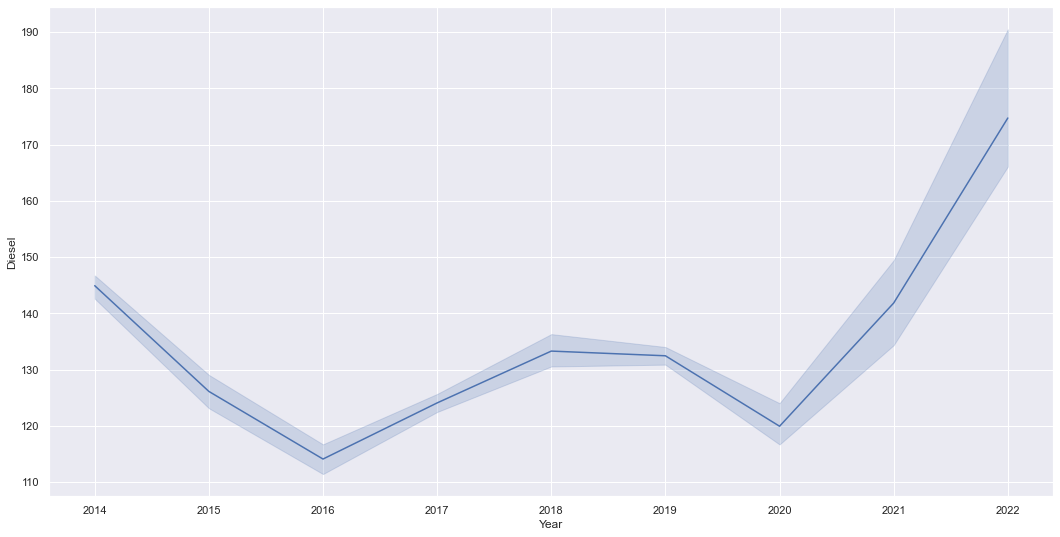

In [30]:
# Plotting the price in diesel since 2014. The graph shows increasing volatility in diesel prices since 2020 

sns.set(rc={'figure.figsize':(18,9)})

sns.lineplot(x='Year', y='Diesel', data=dsl_cst_df)

plt.show()

In [31]:
# I need to create Month Number, Qtr and Season columns to allow for merging with a future dataframe
# I created dictionaries to assign key:value pairs to allow for these columns to be created.

d = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'July': 7, 'Aug': 8, 'Sept': 9, 'Oct':10, 'Nov':11, 'Dec':12}

q = {'Jan': 1, 'Feb': 1, 'Mar': 1, 'Apr': 2, 'May': 2, 'June': 2, 'July': 3, 'Aug': 3, 'Sept': 3, 'Oct':4, 'Nov':4, 'Dec':4}

r = {1:1, 2:1, 3:2, 4:2}

dsl_cst_df['Num_Month'] = dsl_cst_df['Month'].apply(lambda x: d.get(x))

dsl_cst_df['Qtr'] = dsl_cst_df['Month'].apply(lambda x: q.get(x))


print(dsl_cst_df.head())

print(dsl_cst_df.info())

  Month  Year    Reg  Diesel  Num_Month  Qtr
0   Mar  2022  182.4   190.5        3.0  1.0
1   Feb  2022  177.3   167.6        2.0  1.0
2   Jan  2022  175.5   166.1        1.0  1.0
3   Dec  2021  172.5   161.9       12.0  4.0
4   Nov  2021  172.6   163.3       11.0  4.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      99 non-null     object 
 1   Year       99 non-null     int32  
 2   Reg        99 non-null     float64
 3   Diesel     99 non-null     float64
 4   Num_Month  97 non-null     float64
 5   Qtr        97 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 7.1+ KB
None


In [32]:
# Dataframe shows two null values in the Num_Month column
# Identifying the specific rows with null values

bool_series = pd.isnull(dsl_cst_df['Num_Month'])
dsl_cst_df[bool_series]

,Month,Year,Reg,Diesel,Num_Month,Qtr
84,Jul,2015,145.3,132.6,NaN,NaN
96,Jul,2014,157.4,147.6,NaN,NaN


In [33]:
#In the dictionaries 'd' and 'q' earlier in the code the month of July is written as 'July'
# In lines 84 and 96 July is written as 'Jul'
#Adding new Key: Value pair to the dictionary to resolve the issue

d['Jul'] = 7
q['Jul'] = 3

# Re-running the code to add month numbers and qtr

dsl_cst_df['Num_Month'] = dsl_cst_df['Month'].apply(lambda x: d.get(x))

dsl_cst_df['Qtr'] = dsl_cst_df['Month'].apply(lambda x: q.get(x))

dsl_cst_df['Season'] = dsl_cst_df['Qtr'].apply(lambda x: r.get(x))

# Checking if the issue has been resolved

print(dsl_cst_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 102
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      99 non-null     object 
 1   Year       99 non-null     int32  
 2   Reg        99 non-null     float64
 3   Diesel     99 non-null     float64
 4   Num_Month  99 non-null     int64  
 5   Qtr        99 non-null     int64  
 6   Season     99 non-null     int64  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 7.9+ KB
None


In [34]:
#Summary statistics for the dataframe

dsl_cst_df[['Reg' , 'Diesel']].describe()




,Reg,Diesel
count,99.000000,99.000000
mean,140.653535,130.986869
std,12.623070,14.142212
min,121.100000,105.400000
25%,131.500000,120.350000
50%,138.100000,129.800000
75%,146.350000,138.050000
max,182.400000,190.500000


In [35]:
# Melting the Reg and Diesel columns to convert them to variables to allow for comparative analysis

melt_dsl_cst_df = pd.melt(dsl_cst_df, id_vars=['Month', 'Year', 'Num_Month', 'Qtr', 'Season'], value_vars = ['Diesel', 'Reg'], var_name = 'Fuel Type', value_name = 'Price (c)',  ignore_index = True)

print(melt_dsl_cst_df.head())
print(melt_dsl_cst_df.info())

  Month  Year  Num_Month  Qtr  Season Fuel Type  Price (c)
0   Mar  2022          3    1       1    Diesel      190.5
1   Feb  2022          2    1       1    Diesel      167.6
2   Jan  2022          1    1       1    Diesel      166.1
3   Dec  2021         12    4       2    Diesel      161.9
4   Nov  2021         11    4       2    Diesel      163.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      198 non-null    object 
 1   Year       198 non-null    int32  
 2   Num_Month  198 non-null    int64  
 3   Qtr        198 non-null    int64  
 4   Season     198 non-null    int64  
 5   Fuel Type  198 non-null    object 
 6   Price (c)  198 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 10.2+ KB
None


<AxesSubplot:xlabel='Year', ylabel='Price (c)'>

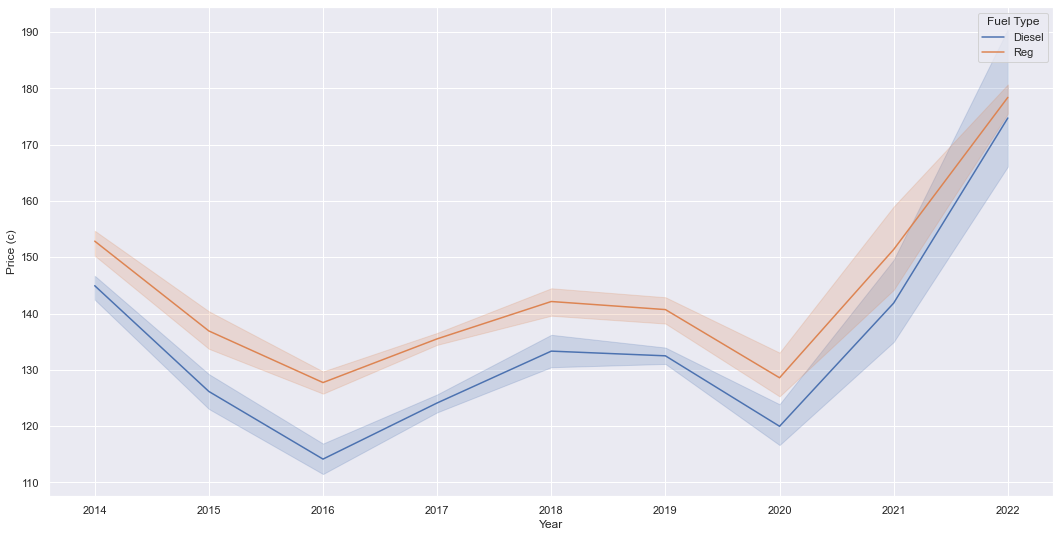

In [36]:
#PLotting out a timeline showing the changes in price in both petrol and diesel since 2014

sns.set(rc={'figure.figsize':(18,9)})

sns.lineplot(data = melt_dsl_cst_df, x = 'Year', y = 'Price (c)', hue = 'Fuel Type')

In [37]:
# Importing data on electricity prices in Ireland since 2014
# Data downloaded from https://ec.europa.eu/eurostat/data/database

ele_cst_df = pd.read_csv('nrg_pc_204__custom_2412797_page_csv.csv')
print(ele_cst_df.head())

      TIME  Ireland
0  2014-S1   0.2407
1  2014-S2   0.2536
2  2015-S1   0.2426
3  2015-S2   0.2454
4  2016-S1   0.2320


In [38]:
#renaming columns

ele_cst_df = ele_cst_df.rename(columns = {'TIME': 'Period', 'Ireland': 'Cost Kwh (€)'})

# Breaking down costs

ele_cst_df['Cost Kwh (c)'] = ele_cst_df['Cost Kwh (€)']*100

ele_cst_df['Cost Wh (c)'] = ele_cst_df['Cost Kwh (c)']/1000

print(ele_cst_df.head())

print(ele_cst_df.info())

    Period  Cost Kwh (€)  Cost Kwh (c)  Cost Wh (c)
0  2014-S1        0.2407         24.07      0.02407
1  2014-S2        0.2536         25.36      0.02536
2  2015-S1        0.2426         24.26      0.02426
3  2015-S2        0.2454         24.54      0.02454
4  2016-S1        0.2320         23.20      0.02320
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Period        15 non-null     object 
 1   Cost Kwh (€)  15 non-null     float64
 2   Cost Kwh (c)  15 non-null     float64
 3   Cost Wh (c)   15 non-null     float64
dtypes: float64(3), object(1)
memory usage: 608.0+ bytes
None


count    15.00
mean     24.40
std       0.97
min      23.05
25%      23.62
50%      24.23
75%      25.38
max      26.16
Name: Cost Kwh (c), dtype: float64


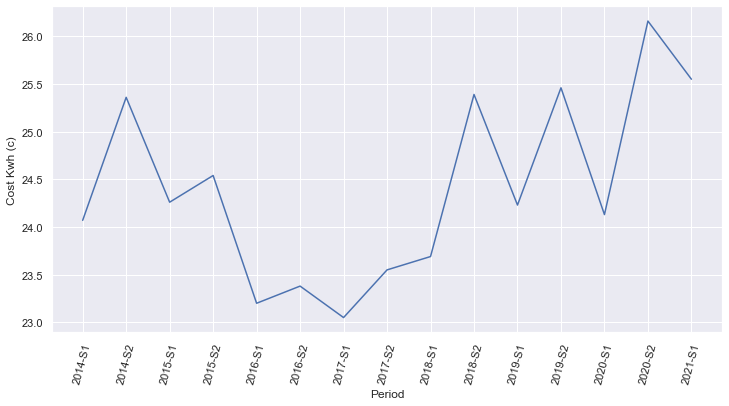

In [39]:
# Summary statistics for Kwhr cost

print(ele_cst_df['Cost Kwh (c)'].describe().round(2))

sns.set(rc={'figure.figsize':(12,6)})

sns.lineplot(data = ele_cst_df, x = 'Period', y = 'Cost Kwh (c)')

plt.xticks(rotation = 75)
plt.show()

In [40]:
# Data Cleaning

# Copying the last character in Period season addendum to the year and putting it in a new column

ele_cst_df['Season'] = ele_cst_df['Period'].map(lambda x: x[-1].split('-')[-1])
                                                                    
print(ele_cst_df.head())
                                                                    

    Period  Cost Kwh (€)  Cost Kwh (c)  Cost Wh (c) Season
0  2014-S1        0.2407         24.07      0.02407      1
1  2014-S2        0.2536         25.36      0.02536      2
2  2015-S1        0.2426         24.26      0.02426      1
3  2015-S2        0.2454         24.54      0.02454      2
4  2016-S1        0.2320         23.20      0.02320      1


In [41]:
#Adding in prices from 2021-S2 and 2022-S1

df = [{'Period':'2021-S2', 'Cost Kwh (€)': 0.2362, 'Cost Kwh (c)':23.62, 'Cost Wh (c)': 0.02362, 'Season': 2 } , {'Period':'2022-S1', 'Cost Kwh (€)': 0.2811, 'Cost Kwh (c)':28.11, 'Cost Wh (c)': 0.02811, 'Season': 1 }]

ele_cst_df = ele_cst_df.append(df, ignore_index = True)

In [42]:
#stripping out the last three characters of the first column and creatring a new Year column



ele_cst_df['Year'] = ele_cst_df['Period'].str[:4].replace(r'\d', '')


print(ele_cst_df.tail())

     Period  Cost Kwh (€)  Cost Kwh (c)  Cost Wh (c) Season  Year
12  2020-S1        0.2413         24.13      0.02413      1  2020
13  2020-S2        0.2616         26.16      0.02616      2  2020
14  2021-S1        0.2555         25.55      0.02555      1  2021
15  2021-S2        0.2362         23.62      0.02362      2  2021
16  2022-S1        0.2811         28.11      0.02811      1  2022


In [43]:
# Moving the Year column to the first position in the dataframe

#Popping off Year column

first_column = ele_cst_df.pop('Year')

#Inserting Year to index 0

ele_cst_df.insert(0, 'Year', first_column)

ele_cst_df['Year'] = ele_cst_df['Year'].astype(int)

ele_cst_df['Season'] = ele_cst_df['Season'].astype(int)

print(ele_cst_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          17 non-null     int32  
 1   Period        17 non-null     object 
 2   Cost Kwh (€)  17 non-null     float64
 3   Cost Kwh (c)  17 non-null     float64
 4   Cost Wh (c)   17 non-null     float64
 5   Season        17 non-null     int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 808.0+ bytes
None


In [44]:
# merging the fuel and electricity cost dataframes

nrg_cst_df = pd.merge(dsl_cst_df, ele_cst_df, how = 'left', left_on = ['Season', 'Year'], right_on = ['Season', 'Year'])

print(nrg_cst_df.head(50))

   Month  Year    Reg  Diesel  Num_Month  Qtr  Season   Period  Cost Kwh (€)  \
0    Mar  2022  182.4   190.5          3    1       1  2022-S1        0.2811   
1    Feb  2022  177.3   167.6          2    1       1  2022-S1        0.2811   
2    Jan  2022  175.5   166.1          1    1       1  2022-S1        0.2811   
3    Dec  2021  172.5   161.9         12    4       2  2021-S2        0.2362   
4    Nov  2021  172.6   163.3         11    4       2  2021-S2        0.2362   
5    Oct  2021  164.6   156.6         10    4       2  2021-S2        0.2362   
6   Sept  2021  155.9   144.9          9    3       2  2021-S2        0.2362   
7    Aug  2021  155.0   144.4          8    3       2  2021-S2        0.2362   
8   July  2021  153.9   143.5          7    3       2  2021-S2        0.2362   
9   June  2021  150.0   140.1          6    2       1  2021-S1        0.2555   
10   May  2021  146.6   138.3          5    2       1  2021-S1        0.2555   
11   Apr  2021  142.9   133.8          4

In [45]:
nrg_cst_df = nrg_cst_df.rename(columns = {'Cost Kwh (c)': 'Electricity'})

print(nrg_cst_df.head(10))

  Month  Year    Reg  Diesel  Num_Month  Qtr  Season   Period  Cost Kwh (€)  \
0   Mar  2022  182.4   190.5          3    1       1  2022-S1        0.2811   
1   Feb  2022  177.3   167.6          2    1       1  2022-S1        0.2811   
2   Jan  2022  175.5   166.1          1    1       1  2022-S1        0.2811   
3   Dec  2021  172.5   161.9         12    4       2  2021-S2        0.2362   
4   Nov  2021  172.6   163.3         11    4       2  2021-S2        0.2362   
5   Oct  2021  164.6   156.6         10    4       2  2021-S2        0.2362   
6  Sept  2021  155.9   144.9          9    3       2  2021-S2        0.2362   
7   Aug  2021  155.0   144.4          8    3       2  2021-S2        0.2362   
8  July  2021  153.9   143.5          7    3       2  2021-S2        0.2362   
9  June  2021  150.0   140.1          6    2       1  2021-S1        0.2555   

   Electricity  Cost Wh (c)  
0        28.11      0.02811  
1        28.11      0.02811  
2        28.11      0.02811  
3        2

I'm not interested in Petrol cars so I will drop the Reg column

In [46]:


nrg_cst_df = pd.melt(nrg_cst_df, id_vars = ['Year', 'Month', 'Season'], 
                     value_vars = ['Diesel', 'Electricity'],
                     var_name = 'Fuel Type', value_name = 'Cost in (c)')

display(nrg_cst_df)

,Year,Month,Season,Fuel Type,Cost in (c)
0,2022,Mar,1,Diesel,190.50
1,2022,Feb,1,Diesel,167.60
2,2022,Jan,1,Diesel,166.10
3,2021,Dec,2,Diesel,161.90
4,2021,Nov,2,Diesel,163.30
...,...,...,...,...,...
193,2014,May,1,Electricity,24.07
194,2014,Apr,1,Electricity,24.07
195,2014,Mar,1,Electricity,24.07
196,2014,Feb,1,Electricity,24.07


In [47]:
nrg_cst_df['Cost in (c)'] = nrg_cst_df['Cost in (c)'].astype(int)

print(nrg_cst_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         198 non-null    int32 
 1   Month        198 non-null    object
 2   Season       198 non-null    int64 
 3   Fuel Type    198 non-null    object
 4   Cost in (c)  198 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 6.3+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

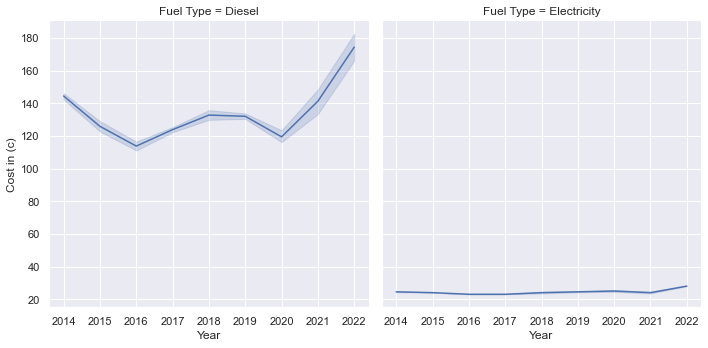

In [48]:
sns.relplot(data=nrg_cst_df, x = 'Year', y = 'Cost in (c)', col = 'Fuel Type', col_wrap = 2, kind = 'line')

plt.show
             
             

Based on the initial analysis of the available electric cars the one that suited my needs most was the Skoda Eniyaq
I will base my calculations on this car as well as my current car, a Megane Sport Tourer Estate.
The Megane runs at 26.3km/l.
Lets look at the Skoda specs again

In [49]:
budg_ev_df.loc[budg_ev_df['Make/Model'] == 'Skoda Enyaq Coupe iV 80']

,Make,Model,Battery_(Kwh),Acceleration_in_Secs_(1-100),Top_Speed_(km/h),Range_(km),Efficiency_(Wh/km),Price_in_Germany (€),Make/Model
70,Skoda,Enyaq Coupe iV 80,77.0,8.7,160.0,455.0,169.0,47000.0,Skoda Enyaq Coupe iV 80


Now to calculate the cost per km for each car

In [50]:
# Calculating cost per km
# Writing a function to cycle through the Fuel Type row and apply a conversion factor based on Fuel Type
# My Megane runs at 26.3km/l and the Skoda runs at 5.9km/Kwh (conversion from Wh/km to km/Kwh done at aqua-calc.com)

def cost_km(row, x, y):
    if row['Fuel Type'] == 'Diesel' :
        return x
    if row['Fuel Type'] == 'Electricity' :
        return y
    return

 

nrg_cst_df['Conversion Factor'] = nrg_cst_df.apply(lambda row: cost_km(row, 26.3, 5.9), axis = 1)

nrg_cst_df['Cost per Km (c)'] = nrg_cst_df['Cost in (c)'] / nrg_cst_df['Conversion Factor']

display(nrg_cst_df)
    

,Year,Month,Season,Fuel Type,Cost in (c),Conversion Factor,Cost per Km (c)
0,2022,Mar,1,Diesel,190,26.3,7.224335
1,2022,Feb,1,Diesel,167,26.3,6.349810
2,2022,Jan,1,Diesel,166,26.3,6.311787
3,2021,Dec,2,Diesel,161,26.3,6.121673
4,2021,Nov,2,Diesel,163,26.3,6.197719
...,...,...,...,...,...,...,...
193,2014,May,1,Electricity,24,5.9,4.067797
194,2014,Apr,1,Electricity,24,5.9,4.067797
195,2014,Mar,1,Electricity,24,5.9,4.067797
196,2014,Feb,1,Electricity,24,5.9,4.067797


Hypothetical - Looking at what the the historical difference in cost would have been to run these cars.

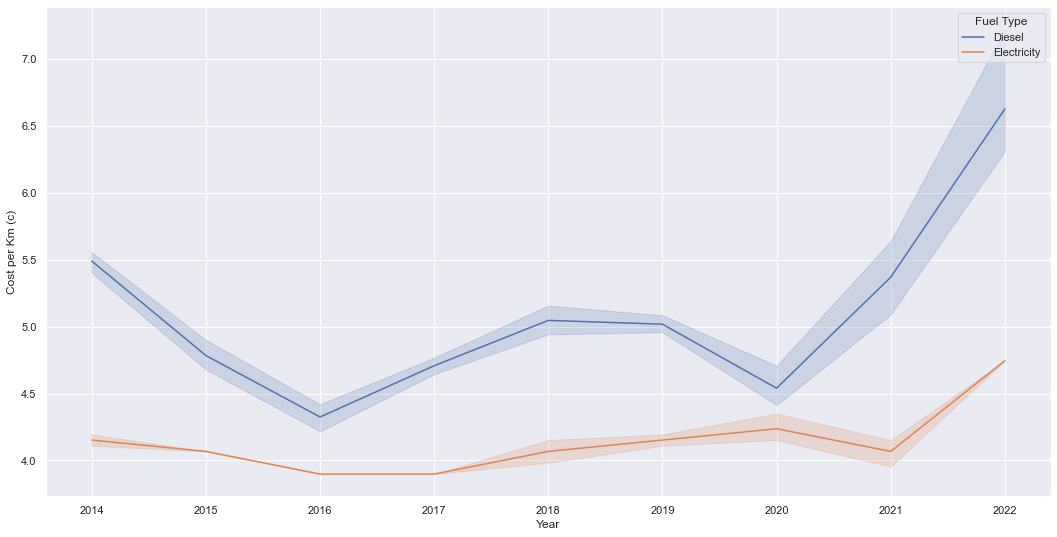

In [51]:
sns.set_style("whitegrid")

sns.set(rc={'figure.figsize':(18,9)})

sns.lineplot(data = nrg_cst_df, x = 'Year', y = 'Cost per Km (c)', hue = 'Fuel Type')

plt.show()

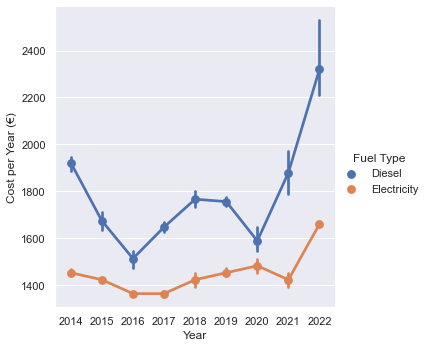

,Year,Month,Season,Fuel Type,Cost in (c),Conversion Factor,Cost per Km (c),Cost per Year (€)
0,2022,Mar,1,Diesel,190,26.3,7.224335,2528.517110
1,2022,Feb,1,Diesel,167,26.3,6.349810,2222.433460
2,2022,Jan,1,Diesel,166,26.3,6.311787,2209.125475
99,2022,Mar,1,Electricity,28,5.9,4.745763,1661.016949
100,2022,Feb,1,Electricity,28,5.9,4.745763,1661.016949
101,2022,Jan,1,Electricity,28,5.9,4.745763,1661.016949


In [52]:
# Checking cost per year based on current mileage
# Multiplying Cost per Km (c) by 350 to get the cost of 35000km driven per year

nrg_cst_df['Cost per Year (€)'] = nrg_cst_df['Cost per Km (c)'] * 350

sns.set(rc={'figure.figsize':(12,6)})

sns.catplot(data = nrg_cst_df, x = 'Year', y = 'Cost per Year (€)', hue = 'Fuel Type', kind = 'point')

plt.show()

nrg_cst_df[nrg_cst_df['Year'] == 2022]

The plot above shows a significant difference in the price of running a diesel car against an electric car at current prices,  €867 a year.
However my current car will need to be changed anyway within the next year or so, so if I was to look at 
comparing the Skoda to another similar sized car how would that work out?
For the purposes of this comparison I have used the Skoda Karoq 2.0l TDI Diesel SUV. 
This car is a similar size and shape to the Skoda Enyaq and runs at 20.3km/l

I will use the custom function *cost_km*, defined earlier, to change the data to facilitate the comparison
between the Karoq and the Enyiaq

,Year,Month,Season,Fuel Type,Cost in (c),Conversion Factor,Cost per Km (c),Cost per Year (€)
0,2022,Mar,1,Diesel,190,20.3,9.359606,3275.862069
1,2022,Feb,1,Diesel,167,20.3,8.226601,2879.310345
2,2022,Jan,1,Diesel,166,20.3,8.177340,2862.068966
99,2022,Mar,1,Electricity,28,5.9,4.745763,1661.016949
100,2022,Feb,1,Electricity,28,5.9,4.745763,1661.016949
101,2022,Jan,1,Electricity,28,5.9,4.745763,1661.016949


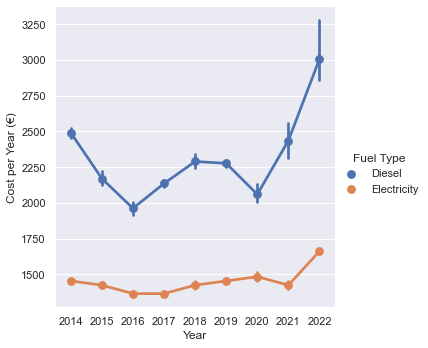

In [53]:
# Applying the cost_km function to the Conversion Factor series

nrg_cst_df['Conversion Factor'] = nrg_cst_df.apply(lambda row: cost_km(row, 20.3, 5.9), axis = 1)

# Recalculating dependent columns

nrg_cst_df['Cost per Km (c)'] = nrg_cst_df['Cost in (c)'] / nrg_cst_df['Conversion Factor']

# Calculating yearly running costs in € based on my annual distance driven

nrg_cst_df['Cost per Year (€)'] = nrg_cst_df['Cost per Km (c)'] * 350

# Plotting out the data

sns.set(rc={'figure.figsize':(18,9)})

sns.catplot(data = nrg_cst_df, x = 'Year', y = 'Cost per Year (€)', hue = 'Fuel Type', kind = 'point')

plt.show

nrg_cst_df[nrg_cst_df['Year'] == 2022]

With the higher fuel consumption of the Skoda Karoq the gap widens even further, to €1614 a year (€3275 - €1661). 
Over 5 years this would equate to a fuel saving of €8070. 

The price difference between the two cars is €12100. 
At this price difference it would take 7.5 years based on fuel consumption costs alone to recoup the extra
cost of purchasing the electric car. I would like to be able to recoup these costs over a shorter period, preferably in under 5 years.

In order for this to work the savings per year would need to be over €2420

Fortunately in my workplace I have access to free fast charging station with which to charge an electric car.
I would like to figure out what percentage of my charging I would need to do at work 
to make the switch to electric financially attractive.

# Calculating 5 Year Costs

In [54]:
five_yr_cost = [[2022, 34900, 47000], [2022, 3275, 1661], [2023, 3275, 1661],
            [2024, 3275, 1661], [2025, 3275, 1661], [2026, 3275, 1661],
            [2027, 3275, 1661], [2028, 3275, 1661], [2029, 3275, 1661],
            [2030, 3275, 1661]]
five_yr_df = pd.DataFrame(five_yr_cost, columns = ['Year', 'Karoq', 'Enyiaq'])

print(five_yr_df.head(10))

   Year  Karoq  Enyiaq
0  2022  34900   47000
1  2022   3275    1661
2  2023   3275    1661
3  2024   3275    1661
4  2025   3275    1661
5  2026   3275    1661
6  2027   3275    1661
7  2028   3275    1661
8  2029   3275    1661
9  2030   3275    1661


In [55]:
def free_chrg(row,  x):
    if row['Enyiaq'] < 47000 :
        return row['Enyiaq'] * x
    return 47000

five_yr_df['Enyiaq_10%'] = five_yr_df.apply(lambda row: free_chrg(row, .9), axis = 1)
five_yr_df['Enyiaq_20%'] = five_yr_df.apply(lambda row: free_chrg(row, .8), axis = 1)
five_yr_df['Enyiaq_30%'] = five_yr_df.apply(lambda row: free_chrg(row, .7), axis = 1)
five_yr_df['Enyiaq_40%'] = five_yr_df.apply(lambda row: free_chrg(row, .6), axis = 1)
five_yr_df['Enyiaq_50%'] = five_yr_df.apply(lambda row: free_chrg(row, .5), axis = 1)
five_yr_df['Enyiaq_60%'] = five_yr_df.apply(lambda row: free_chrg(row, .4), axis = 1)
five_yr_df['Enyiaq_70%'] = five_yr_df.apply(lambda row: free_chrg(row, .3), axis = 1)
five_yr_df['Enyiaq_80%'] = five_yr_df.apply(lambda row: free_chrg(row, .2), axis = 1)

print(five_yr_df.head())

   Year  Karoq  Enyiaq  Enyiaq_10%  Enyiaq_20%  Enyiaq_30%  Enyiaq_40%  \
0  2022  34900   47000     47000.0     47000.0     47000.0     47000.0   
1  2022   3275    1661      1494.9      1328.8      1162.7       996.6   
2  2023   3275    1661      1494.9      1328.8      1162.7       996.6   
3  2024   3275    1661      1494.9      1328.8      1162.7       996.6   
4  2025   3275    1661      1494.9      1328.8      1162.7       996.6   

   Enyiaq_50%  Enyiaq_60%  Enyiaq_70%  Enyiaq_80%  
0     47000.0     47000.0     47000.0     47000.0  
1       830.5       664.4       498.3       332.2  
2       830.5       664.4       498.3       332.2  
3       830.5       664.4       498.3       332.2  
4       830.5       664.4       498.3       332.2  


In [56]:
#Adding Cumulative cost column

cols = five_yr_df.loc[1: 10]

for col in cols:
    
    if col != 'Year':
        five_yr_df[col] = five_yr_df[col].cumsum()
        
    else:
        five_yr_df[col] = five_yr_df[col]
       
    
#five_yr_df['Enyiaq_10%'] = five_yr_df.apply(lambda row: free_chrg(row, .9), axis = 1)
    

#five_yr_df['CUM_Karoq'] = five_yr_df['Karoq'].cumsum()
#five_yr_df['CUM_Enyiaq'] = five_yr_df['Enyiaq'].cumsum()
print(five_yr_df.head())

   Year  Karoq  Enyiaq  Enyiaq_10%  Enyiaq_20%  Enyiaq_30%  Enyiaq_40%  \
0  2022  34900   47000     47000.0     47000.0     47000.0     47000.0   
1  2022  38175   48661     48494.9     48328.8     48162.7     47996.6   
2  2023  41450   50322     49989.8     49657.6     49325.4     48993.2   
3  2024  44725   51983     51484.7     50986.4     50488.1     49989.8   
4  2025  48000   53644     52979.6     52315.2     51650.8     50986.4   

   Enyiaq_50%  Enyiaq_60%  Enyiaq_70%  Enyiaq_80%  
0     47000.0     47000.0     47000.0     47000.0  
1     47830.5     47664.4     47498.3     47332.2  
2     48661.0     48328.8     47996.6     47664.4  
3     49491.5     48993.2     48494.9     47996.6  
4     50322.0     49657.6     48993.2     48328.8  


In [57]:
# Melting the DataFrame to allow for plotting

melt_fiveyr_df = pd.melt(five_yr_df, id_vars = ['Year'], value_vars = ['Karoq',
                        'Enyiaq', 'Enyiaq_10%', 'Enyiaq_20%',
                        'Enyiaq_30%', 'Enyiaq_40%', 'Enyiaq_50%', 'Enyiaq_60%', 'Enyiaq_70%', 'Enyiaq_80%'],
                         var_name = 'Model', value_name = 'CUM_Cost')

print(melt_fiveyr_df.head(100))

    Year       Model  CUM_Cost
0   2022       Karoq   34900.0
1   2022       Karoq   38175.0
2   2023       Karoq   41450.0
3   2024       Karoq   44725.0
4   2025       Karoq   48000.0
..   ...         ...       ...
95  2026  Enyiaq_80%   48661.0
96  2027  Enyiaq_80%   48993.2
97  2028  Enyiaq_80%   49325.4
98  2029  Enyiaq_80%   49657.6
99  2030  Enyiaq_80%   49989.8

[100 rows x 3 columns]


In [58]:
melt_fiveyr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      100 non-null    int64  
 1   Model     100 non-null    object 
 2   CUM_Cost  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


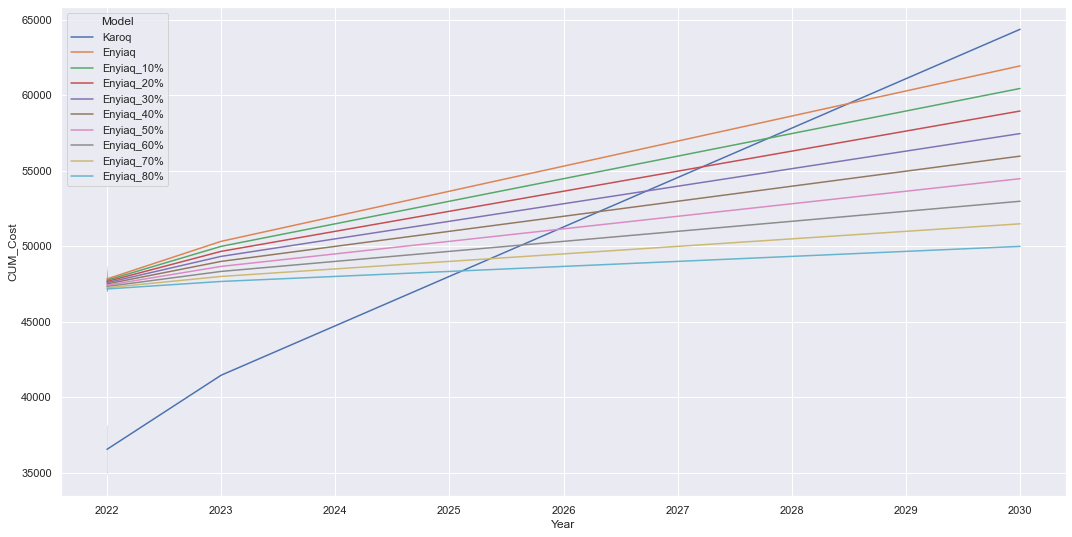

In [59]:
#Plotting out the cumulative costs of running the Enyiaq with different levels of free charging.

sns.set(rc={'figure.figsize':(18,9)})

sns.lineplot(data=melt_fiveyr_df, x = 'Year', y = 'CUM_Cost', hue = 'Model')


plt.show()

The data confirms that based on purchase price and fuel costs I would need to be using free charging points for 
30% of my charging to make the extra price of the electric car make sense.
Using free charging points for 80% of my charging would cut the time down from five years to just over three years.


This analysis doesn't factor in variables such as servicing costs, depreciation, charger proliferation, 
oil price volatility and many other well worth consideration in making a decision like this.


Another interesting learning from this analysis for me was the fact that the investment makes sense for me because of my high mileage. 
I'm not sure the investment would make sense from a financial perspective for a driver driving closer the national average 
of around 20000km (https://www.ccpc.ie/consumers/cars/car-clocking)

Conversely my high mileage would bring me over the recommended lifespan of the car battery (160000km)

I'm not sure yet whether an electric car is the right choice for me but I definitely have a better grasp of the 
pros and cons.